### 휴먼지능정보공학과 201910787 김영서

## 14주 이진 베이지안 모델
Sklearn의 make_classification() 함수는 분류에 쓰일 수 있는 데이터를 생성해준다.


from sklearn.datasets import make_classification<br>
X, Y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0)


Sklearn으로 이진 베이지안 모델링을 해보자.

* (1) X, Y 데이터를 생성

* (2) X의 평균과 표준편차 계산해서 출력

* (3) 그래프 작성

    * scatter() 함수에 c=Y 옵션을 넣으면, Y의 값에 대해 다른 색으로 표시할 수 있다.

* (4) 훈련데이터, 테스트데이터 3:1로 분리

    * train_test_split()함수를 사용하면 원하는 비율로 분리할 수 있다.

* (5) 훈련데이터에 대하여 BernoulliNB 모델링

    * X데이터는 연속 값이다. binarize=0.0으로 설정하여 이진수로 모델링한다.

* (6) 테스트데이터에 대하여 예측값을 출력

    * 예측이 맞는지 실제값 Y와 비교해보자.

* (7) 테스트데이터에 대하여 예측과 실제의 정확성 출력

### (1) X, Y 데이터를 생성

In [14]:
from sklearn.datasets import make_classification

X, Y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0)

In [15]:
print(X[0:5])
print(Y[0:5])
print(len(X))

[[-0.55480972 -0.36537075]
 [ 1.78325013  0.29477285]
 [-0.89489879  0.03202076]
 [ 0.75219171 -0.20754811]
 [ 1.03562074 -1.1017298 ]]
[0 1 0 0 0]
100


### (2) X의 평균과 표준편차 계산해서 출력

In [16]:
print('평균: ',X.mean())
print('표준편차:', X.std())

평균:  0.004436116458517674
표준편차: 1.1725611999732064


### (3) 그래프 작성
scatter() 함수에 c=Y 옵션을 넣으면, Y의 값에 대해 다른 색으로 표시할 수 있다.

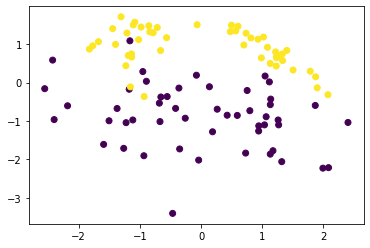

In [17]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], marker='o', c=Y)
plt.show()

### (4) 훈련데이터, 테스트데이터 3:1로 분리
train_test_split()함수를 사용하면 원하는 비율로 분리할 수 있다.

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [20]:
print(len(X_train))
print(len(Y_train))
print(len(X_test))

75
75
25


### (5) 훈련데이터에 대하여 BernoulliNB 모델링

X데이터는 연속 값이다. binarize=0.0으로 설정하여 이진수로 모델링한다.

In [21]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

### (6) 테스트데이터에 대하여 예측값을 출력

예측이 맞는지 실제값 Y와 비교해보자.

In [26]:
bnb.predict(X_test)

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0])

In [22]:
list(zip(bnb.predict(X_test),Y_test, X_test))

[(1, 1, array([-1.30912839,  1.71096184])),
 (1, 1, array([0.49637557, 1.49180776])),
 (1, 1, array([1.08488195, 0.91611556])),
 (1, 1, array([-0.98155389,  1.44289723])),
 (0, 0, array([-0.46555679, -3.40511729])),
 (1, 1, array([-1.08396737,  1.5709795 ])),
 (0, 0, array([ 0.13544191, -0.10999598])),
 (1, 0, array([-0.07689146,  0.19009912])),
 (0, 0, array([ 0.26279108, -0.69407308])),
 (0, 0, array([ 1.03562074, -1.1017298 ])),
 (1, 1, array([-1.44563562,  1.4017259 ])),
 (1, 1, array([-0.7840428 ,  1.29495388])),
 (1, 0, array([-2.42707463,  0.58355239])),
 (0, 0, array([ 1.99019369, -2.22795147])),
 (1, 1, array([0.8149459, 1.1599819])),
 (0, 0, array([-1.50518211, -0.99500167])),
 (1, 1, array([-1.10942601,  1.49918451])),
 (0, 0, array([-2.1830022 , -0.60513413])),
 (0, 0, array([ 0.75219171, -0.20754811])),
 (1, 1, array([-0.83878697,  1.31656537])),
 (1, 1, array([1.40093915, 0.83502292])),
 (0, 1, array([-1.15612136, -0.11234908])),
 (1, 1, array([-0.85390752,  1.47723546]))

In [23]:
bnb.predict([[1,1], [1,-1], [-1,1], [-1,-1], [0,0]])

array([1, 0, 1, 0, 0])

### (7) 테스트데이터에 대하여 예측과 실제의 정확성 출력

In [24]:
bnb.score(X_test, Y_test)

0.88